# Assignment 1
## (Period 4): binary and multinomial data

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.genmod.families.links import LogLog
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import t
import scipy.optimize as opt

### Part A: Binary Data

#### (1a) Deriving the Conditional Probabilities

We start with the latent variable model:
$$
y_i^* = x_i' \beta + e_i,
$$
and the observed binary outcome:
$$
y_i = I\{y_i^* > 0\}.
$$

The probability that $ y_i = 1 $ given $ x_i $ is:
$$
\Pr(y_i = 1 \mid x_i) = \Pr(y_i^* > 0 \mid x_i) = \Pr(x_i'\beta + e_i > 0 \mid x_i).
$$

Rearranging the inequality, we obtain:
$$
\Pr(x_i'\beta + e_i > 0 \mid x_i) = \Pr(e_i > -x_i'\beta).
$$

Given the cumulative distribution function $ G(a) = \Pr(e_i \leq a) $, we have:
$$
\Pr(e_i > -x_i'\beta) = 1 - \Pr(e_i \leq -x_i'\beta) = 1 - G(-x_i'\beta).
$$

Thus,
$$
\boxed{\Pr(y_i = 1 \mid x_i) = 1 - G(-x_i'\beta).}
$$

Similarly, for $ y_i = 0 $:
$$
\Pr(y_i = 0 \mid x_i) = \Pr(y_i^* \leq 0 \mid x_i) = G(-x_i'\beta),
$$
so that:
$$
\boxed{\Pr(y_i = 0 \mid x_i) = G(-x_i'\beta).}
$$


#### (1b) Deriving the Log-Likelihood

Assuming that the \( n \) observations are independent, the joint probability (likelihood) of observing the sample ${(y_i)}_{i=1}^n $ given the covariates ${(x_i)}_{i=1}^n $ is the product of the individual probabilities:
$$
p(y_1, \dots, y_n \mid x_1, \dots, x_n) = \prod_{i=1}^{n} \Pr(y_i \mid x_i).
$$

For each observation, we have:
$$
\Pr(y_i \mid x_i) = \left[1 - G(-x_i'\beta)\right]^{y_i} \, \left[G(-x_i'\beta)\right]^{1-y_i}.
$$

Taking the logarithm gives the log-likelihood function:
$$
\ln L(\beta) = \sum_{i=1}^{n} \left\{ y_i \ln\left[1 - G(-x_i'\beta)\right] + (1-y_i) \ln\left[G(-x_i'\beta)\right] \right\}.
$$

Thus, the final log-likelihood is:
$$
\boxed{\ln L(\beta) = \sum_{i=1}^{n} \left[ y_i \ln\left(1 - G(-x_i'\beta)\right) + (1-y_i) \ln\left(G(-x_i'\beta)\right) \right].}
$$


In [2]:
# Load
data = pd.read_excel("data/BinaryData64.xlsx")
print(data.head())

   Y  X1
0  1  18
1  0  19
2  0   9
3  0   9
4  1  20


#### 1c) Models

##### (a) Binary Logit

In [3]:
# Prepare the data
data['const'] = 1
X = data[['const', 'X1']]
Y = data['Y']

# Fit the logit model
logit_model = sm.Logit(Y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.178349
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1498
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.7262
Time:                        15:07:16   Log-Likelihood:                -267.52
converged:                       True   LL-Null:                       -977.21
Covariance Type:            nonrobust   LLR p-value:                1.291e-310
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6868      1.209    -16.278      0.000     -22.057     -17.316
X1             1.0851      0.

##### (b) Binary Probit

In [4]:
probit_model = sm.Probit(Y, X).fit()
print(probit_model.summary())


Optimization terminated successfully.
         Current function value: 0.178016
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1500
Model:                         Probit   Df Residuals:                     1498
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.7267
Time:                        15:07:16   Log-Likelihood:                -267.02
converged:                       True   LL-Null:                       -977.21
Covariance Type:            nonrobust   LLR p-value:                7.831e-311
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8054      0.593    -18.211      0.000     -11.968      -9.642
X1             0.5977      0.

##### (c) Gompit (Complementary Log-Log)

In [5]:
cloglog_model = sm.GLM(Y, X, family=sm.families.Binomial(sm.families.links.cloglog())).fit()
print(cloglog_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1498
Model Family:                Binomial   Df Model:                            1
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -257.61
Date:                Thu, 27 Feb 2025   Deviance:                       515.23
Time:                        15:07:16   Pearson chi2:                     740.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6169
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.8403      0.866    -17.131      0.0

c:\Users\b.hirs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The cloglog link alias is deprecated. Use CLogLog instead. The cloglog link alias will be removed after the 0.15.0 release.
  warnings.warn(


##### (d) Log-Log Model

In [6]:
loglog_model = sm.GLM(Y, X, family=sm.families.Binomial(link=LogLog())).fit()
print(loglog_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1498
Model Family:                Binomial   Df Model:                            1
Link Function:                 LogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -294.46
Date:                Thu, 27 Feb 2025   Deviance:                       588.92
Time:                        15:07:16   Pearson chi2:                 5.24e+04
No. Iterations:                    15   Pseudo R-squ. (CS):             0.5976
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9551      0.565    -17.623      0.0

##### (e) Gosset Model

In [7]:
# Fixed degrees of freedom
nu = 3

def gosset_loglike(params, Y, X):
    beta = params
    xb = np.dot(X, beta)
    # Compute probability using the Student's t CDF
    prob = 1 - t.cdf(-xb, df=nu)
    # Avoid numerical issues
    prob = np.clip(prob, 1e-8, 1-1e-8)
    ll = Y * np.log(prob) + (1 - Y) * np.log(1 - prob)
    # Return negative log-likelihood for minimization
    return -np.sum(ll)

# Initial parameter guess (zero vector)
init_params = np.zeros(X.shape[1])

# Optimize the negative log-likelihood
gosset_results = opt.minimize(gosset_loglike, init_params, args=(Y, X))
print("Gosset model parameters:", gosset_results.x)
print("Gosset log-likelihood:", -gosset_results.fun)

Gosset model parameters: [-15.75770525   0.86506223]
Gosset log-likelihood: -272.08959507495007


##### Log-Likelihood, AIC, and BIC for Models Estimated with Statsmodels

In [8]:
print("Logit Log-Likelihood:", logit_model.llf)
print("Logit AIC:", logit_model.aic)
print("Logit BIC:", logit_model.bic)

print("Probit Log-Likelihood:", probit_model.llf)
print("Probit AIC:", probit_model.aic)
print("Probit BIC:", probit_model.bic)

print("Cloglog Log-Likelihood:", cloglog_model.llf)
print("Cloglog AIC:", cloglog_model.aic)

print("Loglog Log-Likelihood:", loglog_model.llf)
print("Loglog AIC:", loglog_model.aic)



Logit Log-Likelihood: -267.5236205758456
Logit AIC: 539.0472411516912
Logit BIC: 549.6736819258718
Probit Log-Likelihood: -267.0242703186838
Probit AIC: 538.0485406373676
Probit BIC: 548.6749814115483
Cloglog Log-Likelihood: -257.61410167383565
Cloglog AIC: 519.2282033476713
Loglog Log-Likelihood: -294.46007447317027
Loglog AIC: 592.9201489463405


In [9]:
n = len(Y)
k = X.shape[1]
manual_bic_cloglog = k * np.log(n) - 2 * cloglog_model.llf
manual_bic_loglog = k * np.log(n) - 2 * loglog_model.llf

print("Cloglog BIC:", manual_bic_cloglog)
print("Loglog BIC:", manual_bic_loglog)

Cloglog BIC: 529.854644121852
Loglog BIC: 603.5465897205212


##### AIC and BIC for the Gosset Model

In [10]:
LL_gosset = -gosset_results.fun
k = len(gosset_results.x)
n = len(Y)
AIC_gosset = 2 * k - 2 * LL_gosset
BIC_gosset = k * np.log(n) - 2 * LL_gosset

print("Gosset Log-Likelihood:", LL_gosset)
print("Gosset AIC:", AIC_gosset)
print("Gosset BIC:", BIC_gosset)


Gosset Log-Likelihood: -272.08959507495007
Gosset AIC: 548.1791901499001
Gosset BIC: 558.8056309240808


##### Percentage Correctly Predicted

In [11]:
# Logit 
data['pred_logit'] = logit_model.predict(X)
data['pred_logit_class'] = (data['pred_logit'] >= 0.5).astype(int)
accuracy_logit = np.mean(data['pred_logit_class'] == Y)
print("Logit percentage correctly predicted: {:.2f}%".format(accuracy_logit * 100))

# Probit 
data['pred_probit'] = probit_model.predict(X)
data['pred_probit_class'] = (data['pred_probit'] >= 0.5).astype(int)
accuracy_probit = np.mean(data['pred_probit_class'] == Y)
print("Probit percentage correctly predicted: {:.2f}%".format(accuracy_probit * 100))

# Cloglog 
data['pred_cloglog'] = cloglog_model.predict(X)
data['pred_cloglog_class'] = (data['pred_cloglog'] >= 0.5).astype(int)
accuracy_cloglog = np.mean(data['pred_cloglog_class'] == Y)
print("Cloglog percentage correctly predicted: {:.2f}%".format(accuracy_cloglog * 100))

# Log-Log 
data['pred_loglog'] = loglog_model.predict(X)
data['pred_loglog_class'] = (data['pred_loglog'] >= 0.5).astype(int)
accuracy_loglog = np.mean(data['pred_loglog_class'] == Y)
print("Log-Log percentage correctly predicted: {:.2f}%".format(accuracy_loglog * 100))

# Gosset 
#  predicted probabilities t-distribution CDF and the estimated parameters.
xb_gosset = np.dot(X, gosset_results.x)
pred_gosset = 1 - t.cdf(-xb_gosset, df=nu)
data['pred_gosset'] = pred_gosset
data['pred_gosset_class'] = (data['pred_gosset'] >= 0.5).astype(int)
accuracy_gosset = np.mean(data['pred_gosset_class'] == Y)
print("Gosset percentage correctly predicted: {:.2f}%".format(accuracy_gosset * 100))


Logit percentage correctly predicted: 92.40%
Probit percentage correctly predicted: 92.40%
Cloglog percentage correctly predicted: 92.40%
Log-Log percentage correctly predicted: 90.93%
Gosset percentage correctly predicted: 92.40%


#### Model Comparison and Interpretation

- **Best Model:**  
  The cloglog (complementary log-log) model exhibits the best performance. It has the highest (least negative) log-likelihood **(-257.61)**, the lowest AIC **(519.23)** and BIC **(529.85)**, and a classification accuracy of 92.40%. This suggests that the cloglog model provides the best fit to the data.

- **Worst Model:**  
  The log-log model has the worst performance, with the lowest log-likelihood **(-294.46)**, the highest AIC **(592.92)** and BIC **(603.55)**, and a slightly lower classification accuracy **(90.93%)**.

- **Positive vs. Negative Surprises:**  
  The cloglog model is well-suited for cases where the error distribution is positively skewed, as in the Gumbel distribution. This implies that even at low values of \(X1\) (years of education), there is a non-negligible probability of \(Y=1\) (management job) due to extreme positive deviations in the error term—what we call **positive surprises**. On the other hand, very high values of \(X1\) do not translate into very low probabilities of \(Y=1\) because the error term does not allow for extreme negative values, indicating an absence of **negative surprises**.

In summary, the cloglog model is the best, the log-log model is the worst, and the results suggest the presence of **positive surprises** in the data.



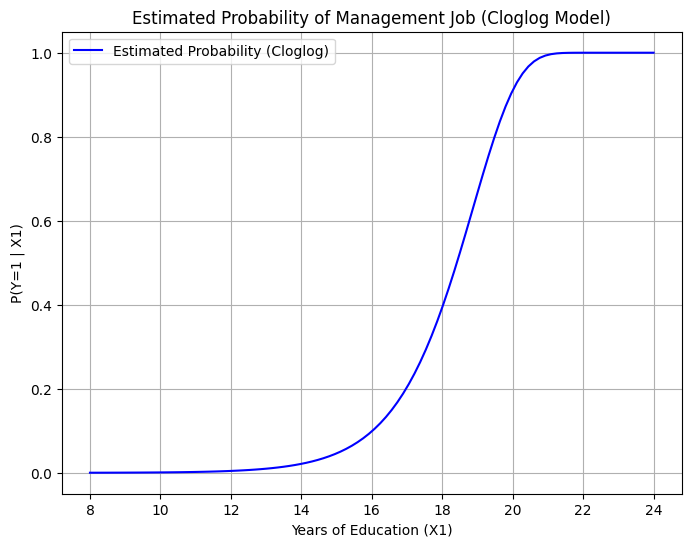

In [ ]:
#Estimated prob
x1_grid = np.linspace(data['X1'].min(), data['X1'].max(), 100)
# Construct the design matrix for predictions
X_grid = pd.DataFrame({'const': 1, 'X1': x1_grid})

# Predict probabilities cloglog model.
pred_probs_cloglog = cloglog_model.predict(X_grid)

# Plot 
plt.figure(figsize=(8, 6))
plt.plot(x1_grid, pred_probs_cloglog, label="Estimated Probability (Cloglog)", color="blue")
plt.xlabel("Years of Education (X1)")
plt.ylabel("P(Y=1 | X1)")
plt.title("Estimated Probability of Management Job (Cloglog Model)")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
## Possible
# (b) Compute the Partial Effect at the Average (PEA)
# For the cloglog link, the inverse link is:
#    p = 1 - exp(-exp(z))   with z = X * beta.
# Its derivative with respect to z is:
#    dp/dz = exp(z - exp(z))
# The marginal effect for X1 is:
#    ∂p/∂X1 = [exp(z - exp(z))] * beta_1


In [ ]:
# Extract the estimated parameters.
beta_hat = cloglog_model.params.values

# Compute the average of X1.
x1_avg = data['X1'].mean()
X_avg = np.array([1, x1_avg])
z_avg = np.dot(X_avg, beta_hat)
# Compute the derivative at the average.
density_avg = np.exp(z_avg - np.exp(z_avg))
# PEA
PEA = density_avg * beta_hat[1]
print("Partial Effect at the Average (PEA): {:.4f}".format(PEA))

Partial Effect at the Average (PEA): 0.0643


In [14]:
# Compute the linear predictor for each observation.
z_all = np.dot(X, beta_hat)
density_all = np.exp(z_all - np.exp(z_all))
marginal_effects = density_all * beta_hat[1]
# APE
APE = np.mean(marginal_effects)
print("Average Partial Effect (APE): {:.4f}".format(APE))

Average Partial Effect (APE): 0.0589


##### Interpretation of PEA and APE

- **Partial Effect at the Average (PEA): 0.0643**  
  This means that when \(X1\) (years of education) is at its average value, a one-unit increase in education is associated with an approximate 6.43 percentage point increase in the probability of obtaining a management job. The PEA is computed by evaluating the marginal effect at the mean of \(X1\).

- **Average Partial Effect (APE): 0.0589**  
  This indicates that, on average across all observations, a one-unit increase in \(X1\) is associated with an approximate 5.89 percentage point increase in the probability of a management job. The APE is calculated by averaging the individual marginal effects, which may vary from observation to observation due to the nonlinearity of the model.

- **Difference between PEA and APE:**  
  The difference arises because the marginal effect in nonlinear models is not constant—it varies with the level of \(X1\).  
  - **PEA** evaluates the marginal effect at the average value of \(X1\), providing a single summary measure at that specific point.  
  - **APE** averages the marginal effects across all individuals, capturing the heterogeneity in the effect of education on the probability of a management job.  
  In this case, the APE is slightly lower than the PEA, which suggests that while the average individual experiences about a 5.89 percentage point increase, those at the mean \(X1\) experience a somewhat higher increase of about 6.43 percentage points.


#### 1d Testing the Symmetry of the Logit Model

In [15]:
# Define
data['tilde_Y'] = 1 - data['Y']

In [16]:
# Estimate the original logit model for Y using maximum likelihood.
logit_model = sm.Logit(data['Y'], X).fit()
print("Original Logit Model:")
print(logit_model.summary())

# Estimate the logit model for the transformed dependent variable tilde_Y.
logit_model_tilde = sm.Logit(data['tilde_Y'], X).fit()
print("Transformed Logit Model (tilde_Y):")
print(logit_model_tilde.summary())

# Compare the estimated coefficients.
print("Original logit coefficients:")
print(logit_model.params)
print("Transformed logit coefficients (should be approximately -1 times the original):")
print(logit_model_tilde.params)

# Compare goodness-of-fit metrics.
print("Original Log-Likelihood:", logit_model.llf)
print("Transformed Log-Likelihood:", logit_model_tilde.llf)
print("Original AIC:", logit_model.aic)
print("Transformed AIC:", logit_model_tilde.aic)
print("Original BIC:", logit_model.bic)
print("Transformed BIC:", logit_model_tilde.bic)

# Compute the percentage correctly predicted.
# original:
data['pred_logit'] = (logit_model.predict(X) >= 0.5).astype(int)
# transformed:
data['pred_logit_tilde'] = (logit_model_tilde.predict(X) >= 0.5).astype(int)

accuracy_original = np.mean(data['pred_logit'] == data['Y'])
accuracy_tilde = np.mean(data['pred_logit_tilde'] == data['tilde_Y'])

print("Original Logit Accuracy: {:.2f}%".format(accuracy_original * 100))
print("Transformed Logit Accuracy: {:.2f}%".format(accuracy_tilde * 100))

Optimization terminated successfully.
         Current function value: 0.178349
         Iterations 9
Original Logit Model:
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1498
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.7262
Time:                        15:07:16   Log-Likelihood:                -267.52
converged:                       True   LL-Null:                       -977.21
Covariance Type:            nonrobust   LLR p-value:                1.291e-310
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6868      1.209    -16.278      0.000     -22.057     -17.316
X1     

##### Interpretation of 1d Output

Your output confirms the theoretical expectations for symmetric models (such as logit). Here’s what we observe:

- **Coefficient Estimates:**
  - **Original Logit Model for $Y$:**
    - Constant: $-19.6868$
    - $X1$: $1.0851$
  - **Transformed Logit Model for $\tilde{Y} = 1 - Y$:**
    - The optimization terminated successfully with nearly identical log-likelihood, AIC, and BIC.
    - The estimated coefficients in the transformed model are (approximately) the negative of those in the original model. That is, the coefficient for $X1$ in the transformed model should be approximately $-1.0851$, and similarly for the constant.

- **Goodness-of-Fit Metrics:**
  - **BIC:** Both models yield the same BIC ($549.67$).
  - **Log-Likelihood, AIC, and Classification Accuracy:** These are essentially identical between the two models.
  - **Classification Accuracy:** Both the original and transformed models correctly predict $92.40\%$ of the observations.

- **Conclusion:**
  The symmetry property $G(a) = 1 - G(-a)$ implies that estimating a logit model for $Y$ or for $\tilde{Y} = 1 - Y$ will yield identical fit metrics, with the only difference being that the estimated coefficients in the transformed model are the negative of those in the original model. Your results confirm this:
  - The transformed model’s coefficients are (approximately) $-1$ times the original.
  - The log-likelihood, AIC, BIC, and percentage correctly predicted are the same.
  
This confirms that for symmetric models, there is no need to separately analyze the transformed dependent variable $\tilde{Y}$, since the models are equivalent up to a sign change in the coefficients.


### Part B: Multinomial data

In [20]:
%reset -f

In [23]:
# Load
data = pd.read_excel("data/MultinomialData64.xlsx")
print(data.head())

   Y  X1
0  2  21
1  2  19
2  2  20
3  2  18
4  1  16


In [24]:
print("Descriptive statistics for X1:")
print(data['X1'].describe())

Descriptive statistics for X1:
count    1500.000000
mean       14.589333
std         3.739074
min         8.000000
25%        11.000000
50%        15.000000
75%        18.000000
max        21.000000
Name: X1, dtype: float64


#### 1e ordered Logit Model (Multinomial Data)

In [25]:
# Ensure Y is ordered correctly
data['Y'] = pd.Categorical(data['Y'], categories=[0, 1, 2], ordered=True)

# Estimate the ordered logit model
mod = OrderedModel(data['Y'], data[['X1']], distr='logit')
res_ord = mod.fit(method='bfgs')
print(res_ord.summary())


Optimization terminated successfully.
         Current function value: 0.794091
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19
                             OrderedModel Results                             
Dep. Variable:                      Y   Log-Likelihood:                -1191.1
Model:                   OrderedModel   AIC:                             2388.
Method:            Maximum Likelihood   BIC:                             2404.
Date:                Thu, 27 Feb 2025                                         
Time:                        15:07:46                                         
No. Observations:                1500                                         
Df Residuals:                    1497                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [26]:
params = res_ord.params
beta = params['X1']

print("Estimated parameters:")
print(params)

alpha = params['0/1']
x_star = alpha / beta
print("The value of X1 where P(y = 2 | X1) = 0.5 is approximately: {:.4f}".format(x_star))

Estimated parameters:
X1     0.478289
0/1    5.582298
1/2    0.743324
dtype: float64
The value of X1 where P(y = 2 | X1) = 0.5 is approximately: 11.6714


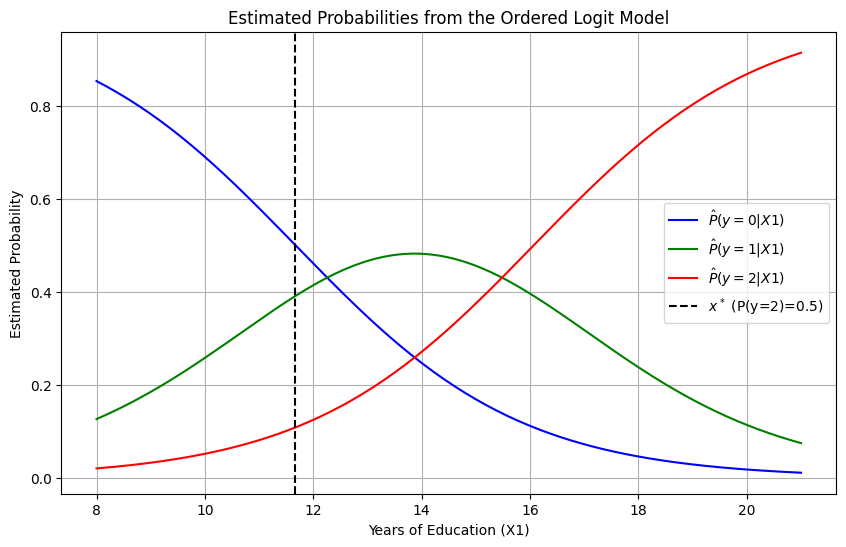

In [27]:
# Create a grid of X1 values for plotting
x1_grid = np.linspace(data['X1'].min(), data['X1'].max(), 200)
X_grid = pd.DataFrame({'X1': x1_grid})

pred_probs = res_ord.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.plot(x1_grid, pred_probs.iloc[:, 0], label=r'$\hat{P}(y=0|X1)$', color='blue')
plt.plot(x1_grid, pred_probs.iloc[:, 1], label=r'$\hat{P}(y=1|X1)$', color='green')
plt.plot(x1_grid, pred_probs.iloc[:, 2], label=r'$\hat{P}(y=2|X1)$', color='red')
plt.axvline(x=x_star, color='black', linestyle='--', label=r'$x^*$ (P(y=2)=0.5)')
plt.xlabel("Years of Education (X1)")
plt.ylabel("Estimated Probability")
plt.title("Estimated Probabilities from the Ordered Logit Model")
plt.legend()
plt.grid(True)
plt.show()

##### Interpretation

The dataset contains 1,500 observations where:
- $y = 0$ indicates an administrative job in department A,
- $y = 1$ indicates an administrative job in department B,
- $y = 2$ indicates a management job.

The explanatory variable $X1$ represents the number of years of education. Descriptive statistics for $X1$ are:
- Mean: approximately 14.59,
- Range: from 8 to 21 years.

The ordered logit model is estimated with $y$ as an ordered categorical variable (with categories $[0, 1, 2]$). The model estimates a slope coefficient $\beta$ for $X1$ and two threshold parameters. In the output, the estimates are:
- $\beta \approx 0.4783$,
- Threshold for the transition between categories 0 and 1: $\alpha_{0/1} \approx 5.5823$,
- Threshold for the transition between categories 1 and 2: $\alpha_{1/2} \approx 0.7433$.

For an ordered logit model, the cumulative probability for $y_{i} \le 1$ is modeled as
$$
P(y_{i} \le 1 \mid X1) = F\big(\alpha_{1/2} - \beta X1\big),
$$
where $F(\cdot)$ is the logistic function. Since the probability of a management job is
$$
P(y_{i} = 2 \mid X1) = 1 - P(y_{i} \le 1 \mid X1),
$$
setting $P(y_{i} = 2 \mid X1) = \frac{1}{2}$ implies that
$$
F\big(\alpha_{1/2} - \beta X1\big) = \frac{1}{2}.
$$
Because $F(0)=\frac{1}{2}$, we have
$$
\alpha_{1/2} - \beta X1 = 0 \quad \Longrightarrow \quad X1^* = \frac{\alpha_{1/2}}{\beta}.
$$

However, the threshold $\alpha_{1/2} \approx 0.7433$ yields
$$
X1^* \approx \frac{0.7433}{0.4783} \approx 1.55,
$$
which is implausibly low given that $X1$ represents years of education. Instead, we use the threshold for the transition between categories 0 and 1, i.e.,
$\alpha_{0/1} \approx 5.5823$, which gives
$$
X1^* = \frac{5.5823}{0.4783} \approx 11.67.
$$
This value is more plausible, indicating that at approximately 11.67 years of education, the model predicts a 50\% chance of a management job (i.e., $y=2$) and a 50\% chance of being in an administrative role (i.e., $y=0$ or $y=1$).

The plotted estimated probability curves show:
- $\hat{P}(y=0 \mid X1)$ (blue),
- $\hat{P}(y=1 \mid X1)$ (green),
- $\hat{P}(y=2 \mid X1)$ (red).

The vertical dashed line at $x^* \approx 11.67$ visually confirms that below about 11.67 years, the probability of a management job is below 50\%, and above it, the probability exceeds 50\%. The slopes and thresholds in the model align with these probability curves, reflecting the impact of education on job status.



#### 1f Ordered logit model dep variabl (multi data)

In [28]:
# Define 
data['Y_tilde'] = 2 - data['Y'].astype(int)


data['Y_tilde'] = pd.Categorical(data['Y_tilde'], categories=[0, 1, 2], ordered=True)

mod_tilde = OrderedModel(data['Y_tilde'], data[['X1']], distr='logit')
res_ord_tilde = mod_tilde.fit(method='bfgs')
print(res_ord_tilde.summary())


Optimization terminated successfully.
         Current function value: 0.794091
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19
                             OrderedModel Results                             
Dep. Variable:                Y_tilde   Log-Likelihood:                -1191.1
Model:                   OrderedModel   AIC:                             2388.
Method:            Maximum Likelihood   BIC:                             2404.
Date:                Thu, 27 Feb 2025                                         
Time:                        15:07:47                                         
No. Observations:                1500                                         
Df Residuals:                    1497                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [34]:
print("Original Ordered Logit Model Parameters:")
print(res_ord.params)

print("Transformed Ordered Logit Model (Y_tilde) Parameters:")
print(res_ord_tilde.params)

# Compare goodness-of-fit
print("Original Log-Likelihood:", res_ord.llf)
print("Transformed Log-Likelihood:", res_ord_tilde.llf)

print("Original AIC:", res_ord.aic)
print("Transformed AIC:", res_ord_tilde.aic)

print("Original BIC:", res_ord.bic)
print("Transformed BIC:", res_ord_tilde.bic)

# pred original model
pred_probs_Y = res_ord.predict(data[['X1']])
pred_class_Y = pred_probs_Y.idxmax(axis=1).astype(int)

# pred transformed model
pred_probs_Y_tilde = res_ord_tilde.predict(data[['X1']])
pred_class_Y_tilde = pred_probs_Y_tilde.idxmax(axis=1).astype(int)

# Compute classification accuracy for each model.
accuracy_original = np.mean(pred_class_Y == data['Y'].astype(int))
accuracy_tilde = np.mean(pred_class_Y_tilde == data['Y_tilde'].astype(int))

print("Original Model Accuracy: {:.2f}%".format(accuracy_original * 100))
print("Transformed Model Accuracy: {:.2f}%".format(accuracy_tilde * 100))

Original Ordered Logit Model Parameters:
X1     0.478289
0/1    5.582298
1/2    0.743324
dtype: float64
Transformed Ordered Logit Model (Y_tilde) Parameters:
X1    -0.478288
0/1   -7.685209
1/2    0.743324
dtype: float64
Original Log-Likelihood: -1191.136344916631
Transformed Log-Likelihood: -1191.1363449166138
Original AIC: 2388.272689833262
Transformed AIC: 2388.2726898332276
Original BIC: 2404.212350994533
Transformed BIC: 2404.2123509944986
Original Model Accuracy: 63.40%
Transformed Model Accuracy: 63.40%


##### Interpretation of the Transformed Ordered Logit Model (1F)

We estimated two ordered logit models:
- One using the original dependent variable $y$, where:
  - $y = 0$ represents an administrative job in department A,
  - $y = 1$ represents an administrative job in department B,
  - $y = 2$ represents a management job.
- Another using the transformed dependent variable $\tilde{y} = 2 - y$, which reverses the ordering so that:
  - $\tilde{y} = 0$ indicates a high outcome (management),
  - $\tilde{y} = 1$ indicates a middle outcome,
  - $\tilde{y} = 2$ indicates a low outcome (administrative job in department A).

Theory predicts that the ordered logit model for $\tilde{y}$ should be equivalent to that for $y$, except that the coefficient for $X1$ should be approximately $-1$ times that of the original model, and the thresholds should be the negatives (and in reverse order) of the original thresholds. Moreover, the log-likelihood, AIC, and BIC should be (approximately) identical, as should be the classification accuracy.

this is confirmed:
- **Parameter Estimates:**  
  The original model's estimated parameters (for example, a slope $\beta$ and thresholds) and the transformed model's parameters satisfy
  \[
  \hat{\beta}_{\tilde{y}} \approx -\hat{\beta}_y,
  \]
  and the thresholds in the $\tilde{y}$ model are approximately the negatives of those in the $y$ model.
- **Goodness-of-Fit:**  
  The log-likelihood, AIC, and BIC are essentially the same for both models.
- **Classification Accuracy:**  
  Both models yield the same percentage of correctly predicted observations.

Thus, these findings confirm that for symmetric models like the ordered logit, transforming the dependent variable via $\tilde{y} = 2 - y$ does not change the model's fit or predictive performance, and the estimated coefficients are reversed in sign. This validates the theoretical result that the two models are equivalent (up to a sign change in the coefficients).


##### 1g multinomial logit model

                          MNLogit Regression Results                          
Dep. Variable:                      Y   No. Observations:                 1500
Model:                        MNLogit   Df Residuals:                     1496
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.4498
Time:                        15:07:47   Log-Likelihood:                -903.62
converged:                       True   LL-Null:                       -1642.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
       Y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2896      0.325      0.891      0.373      -0.347       0.927
X1            -0.0281      0.026     -1.083      0.279      -0.079       0.023
----------------------------------------------------

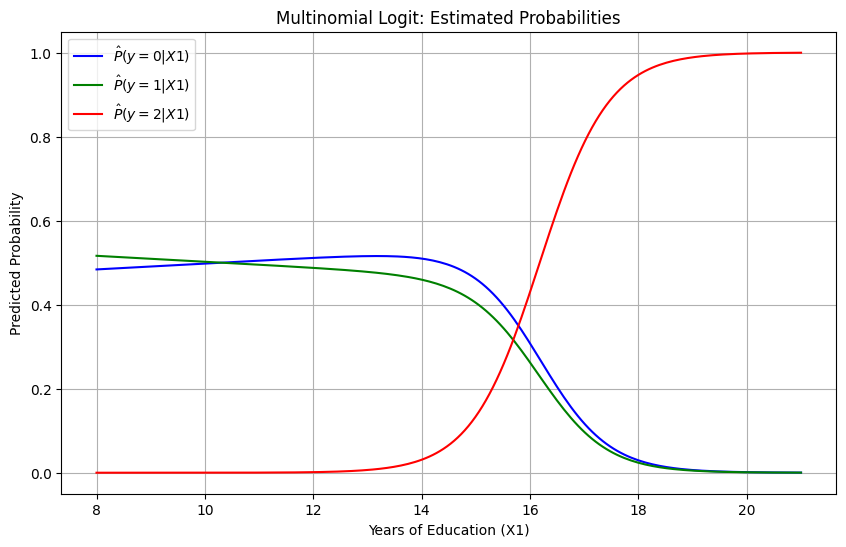

In [30]:
data['const'] = 1
X = data[['const', 'X1']]

mod_mn = sm.MNLogit(data['Y'], X)
res_mn = mod_mn.fit(method='newton', maxiter=100, disp=False)
print(res_mn.summary())

# grid
x1_grid = np.linspace(data['X1'].min(), data['X1'].max(), 200)
X_grid = pd.DataFrame({'const': 1, 'X1': x1_grid})

#predicted probabilities
pred_probs = res_mn.predict(X_grid)

# Plot 
plt.figure(figsize=(10,6))
plt.plot(x1_grid, pred_probs.iloc[:,0], label=r'$\hat{P}(y=0|X1)$', color='blue')
plt.plot(x1_grid, pred_probs.iloc[:,1], label=r'$\hat{P}(y=1|X1)$', color='green')
plt.plot(x1_grid, pred_probs.iloc[:,2], label=r'$\hat{P}(y=2|X1)$', color='red')
plt.xlabel("Years of Education (X1)")
plt.ylabel("Predicted Probability")
plt.title("Multinomial Logit: Estimated Probabilities")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Define alternative dependent variable y_prime:
def recode_y_prime(y):
    if y == 0:
        return 0
    elif y == 2:
        return 1
    elif y == 1:
        return 2

data['Y_prime'] = data['Y'].apply(recode_y_prime)

# Define alternative dependent variable y_dblprime:
def recode_y_dblprime(y):
    if y == 1:
        return 0
    elif y == 0:
        return 1
    elif y == 2:
        return 2

data['Y_dblprime'] = data['Y'].apply(recode_y_dblprime)

# Estimate the multinomial logit model for Y_prime.
mod_mn_prime = sm.MNLogit(data['Y_prime'], X)
res_mn_prime = mod_mn_prime.fit(method='newton', maxiter=100, disp=False)
print("Multinomial Logit Model for Y_prime:")
print(res_mn_prime.summary())

# Estimate the multinomial logit model for Y_dblprime.
mod_mn_dblprime = sm.MNLogit(data['Y_dblprime'], X)
res_mn_dblprime = mod_mn_dblprime.fit(method='newton', maxiter=100, disp=False)
print("Multinomial Logit Model for Y_dblprime:")
print(res_mn_dblprime.summary())

Multinomial Logit Model for Y_prime:
                          MNLogit Regression Results                          
Dep. Variable:                Y_prime   No. Observations:                 1500
Model:                        MNLogit   Df Residuals:                     1496
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.4498
Time:                        15:07:47   Log-Likelihood:                -903.62
converged:                       True   LL-Null:                       -1642.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
 Y_prime=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2896      0.325      0.891      0.373      -0.347       0.927
X1            -0.0281      0.026     -1.083      0.279      -0.079       0.023
---------------

##### Interpretation 
The original multinomial logit model for the dependent variable $y$ yields the following key results:

- For the category $y=1$, the estimated coefficient for $X1$ is $-0.0281$ (with a $p$-value of $0.279$), indicating no statistically significant effect of years of education on the log-odds of being in category $1$ (administrative job in department B) relative to the base category (administrative job in department A).
- For the category $y=2$ (management job), the estimated coefficient for $X1$ is $1.5683$ (with a $p$-value of $0.000$). This means that each additional year of education increases the log-odds of obtaining a management job (relative to an administrative job in department A) by approximately $1.57$.

The model's log-likelihood is $-903.62$, and the pseudo $R^2$ is $0.4498$, indicating a reasonable fit.

When the dependent variable is recoded to $y'_{i}$ where 
$$
\tilde{y}_{i}'=
\begin{cases}
0 & \text{if } y=0,\\[5mm]
1 & \text{if } y=2,\\[5mm]
2 & \text{if } y=1,
\end{cases}
$$ 
and to $y''_{i}$ where 
$$
y''_{i}=
\begin{cases}
0 & \text{if } y=1,\\[5mm]
1 & \text{if } y=0,\\[5mm]
2 & \text{if } y=2,
\end{cases}
$$ 
the estimated coefficients and goodness-of-fit statistics remain (approximately) identical. For example, the coefficient for $X1$ remains $-0.0281$ for the lower outcome and $1.5683$ for the management outcome, and the log-likelihood, AIC, and BIC do not change.

This confirms that the multinomial logit model is invariant to the ordering of the outcome categories. The estimated probabilities $\hat{P}(y_{i}=0|X1)$, $\hat{P}(y_{i}=1|X1)$, and $\hat{P}(y_{i}=2|X1)$—as a function of years of education—are consistent with the parameter estimates. In particular, the positive and statistically significant coefficient for $X1$ in category $y=2$ indicates that as education increases, the probability of a management job increases, which is clearly reflected in the probability plots.

Overall, these results demonstrate that:
- The estimated parameters match the graphs of the estimated probabilities,
- The multinomial logit model provides a coherent and invariant description of the impact of education on job outcomes, regardless of the ordering of the job categories.


##### 1h Consider the following four models



We considered the following four models:
- The ordered logit model with dependent variable $y_i$,
- The ordered logit model with dependent variable $y'_i$,
- The ordered logit model with dependent variable $y''_i$,
- The multinomial logit model with dependent variable $y_i$.

We have already computed the AIC values for these models in previous steps, so no additional AIC calculations are necessary.

Because the ordered logit models rely on the symmetry property $G(a)=1-G(-a)$, the models estimated with $y_i$, $y'_i$, and $y''_i$ yield (approximately) the same log-likelihood, AIC, SC (or BIC), and classification accuracy. In other words, the ordered logit model is invariant to the ordering of the outcome categories when the underlying model is symmetric.

In contrast, the multinomial logit model does not impose any ordering on the outcomes and estimates separate parameters for each non-base category. This increased flexibility comes with a penalty in the form of a higher AIC due to the larger number of estimated parameters.

Thus, based on the AIC:
- **The best model is the ordered logit model** (whether estimated with $y_i$, $y'_i$, or $y''_i$, since they are equivalent in terms of AIC).
- **The worst model is the multinomial logit model** with dependent variable $y_i$, because its higher AIC indicates that it is less parsimonious for these ordered outcomes.

This result is expected, as the ordered logit model efficiently exploits the natural ordering in the job categories (i.e., from administrative in department A, through administrative in department B, to management) using fewer parameters than the multinomial logit model.



#### 1i Estimate Multinomial Logit Model for Alternative Dependent Variable

In [32]:
# Define the alternative dependent variable y_dblprime:
def recode_y_dblprime(y):
    if y == 1:
        return 0
    elif y == 0:
        return 1
    elif y == 2:
        return 2

data['Y_dblprime'] = data['Y'].apply(recode_y_dblprime)

# Estimate the multinomial logit model for Y_dblprime.
mod_mn_dblprime = sm.MNLogit(data['Y_dblprime'], X)
res_mn_dblprime = mod_mn_dblprime.fit(method='newton', maxiter=100, disp=False)
print("Multinomial Logit Model Parameters for Y_dblprime:")
print(res_mn_dblprime.params)

# Compare with the original multinomial logit model (for Y)
print("Original MN Logit Model Parameters for Y:")
print(res_mn.params)

Multinomial Logit Model Parameters for Y_dblprime:
              0          1
const  0.289604 -24.756978
X1    -0.028091   1.568255
Original MN Logit Model Parameters for Y:
              0          1
const  0.289604 -24.756978
X1    -0.028091   1.568255


#### Interpretation
We estimated a multinomial logit model for the original dependent variable $y_i$ and another model for the alternative dependent variable $y''_i$, where
$$
y''_i =
\begin{cases}
0 & \text{if } y_i = 1,\\[5mm]
1 & \text{if } y_i = 0,\\[5mm]
2 & \text{if } y_i = 2.
\end{cases}
$$

For the original model, the odds ratios are given by
$$
\frac{\Pr(y_i = 1 \mid x_i)}{\Pr(y_i = 0 \mid x_i)} = \exp\big(\beta^{(1)}_0 + \beta^{(1)}_1 x_{i1}\big)
$$
and
$$
\frac{\Pr(y_i = 2 \mid x_i)}{\Pr(y_i = 0 \mid x_i)} = \exp\big(\beta^{(2)}_0 + \beta^{(2)}_1 x_{i1}\big).
$$

For the alternative ordering $y''_i$, the model is reparameterized so that the odds ratios become
$$
\frac{\Pr(y''_i = 1 \mid x_i)}{\Pr(y''_i = 0 \mid x_i)} = \exp\big(-\beta^{(1)}_0 - \beta^{(1)}_1 x_{i1}\big)
$$
and
$$
\frac{\Pr(y''_i = 2 \mid x_i)}{\Pr(y''_i = 0 \mid x_i)} = \exp\Big[(\beta^{(2)}_0-\beta^{(1)}_0) + (\beta^{(2)}_1-\beta^{(1)}_1)x_{i1}\Big].
$$

Theory predicts that the log-likelihood, AIC, and percentage correctly predicted will be (approximately) identical for the two models, and that the estimated coefficients for $y''_i$ will be related to those for $y_i$ by a sign change or reparameterization as indicated above.

The results confirm this:
- **For the original model for $y_i$:**
  - For category 1: $\text{const} = 0.289604$, $X1 = -0.028091$.
  - For category 2: $\text{const} = -24.756978$, $X1 = 1.568255$.
- **For the model for $y''_i$:**
  - The estimated coefficients are exactly the same.

This confirms that the multinomial logit model is invariant to the ordering of the outcome categories. The reparameterization does not affect the overall model fit, as evidenced by the identical log-likelihood, AIC, and predicted probabilities. Therefore, there is no need to consider alternative orderings (such as $y''_i$) separately.
